<a href="https://colab.research.google.com/github/wayne0git/ml_cv_basics/blob/master/optical_flow/optical_flow_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optical Flow in OpenCV
Ref - https://learnopencv.com/optical-flow-in-opencv/

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Parameter

In [18]:
ALGO_DENSE = 'lucaskanade_dense' # lucaskanade_dense, rlof
VIDEO_FPATH = 'people.mp4'
NEXT_FID = 3

In [3]:
# Params for ShiTomasi corner detection
PARAM_FEATURE = dict(maxCorners=100, qualityLevel=0.1, minDistance=20, blockSize=7)

# Params for lucas kanade optical flow
PARAM_LK = dict(winSize=(30, 30), maxLevel=2, 
         criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

### Load Data

In [4]:
# read the video
cap = cv2.VideoCapture(VIDEO_FPATH)

In [5]:
# read first frame
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

In [6]:
# Read the next frame
cap.set(cv2.CAP_PROP_POS_FRAMES, NEXT_FID)
ret, frame = cap.read()
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

### Feature Extraction (Sparse)

In [7]:
# find corners
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **PARAM_FEATURE)  # (18, 1, 2) feature point coordinate

### Run Optical Flow (Sparse)

In [8]:
# Calculate optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **PARAM_LK)

# Select good points
good_old = p0[st == 1]
good_new = p1[st == 1]

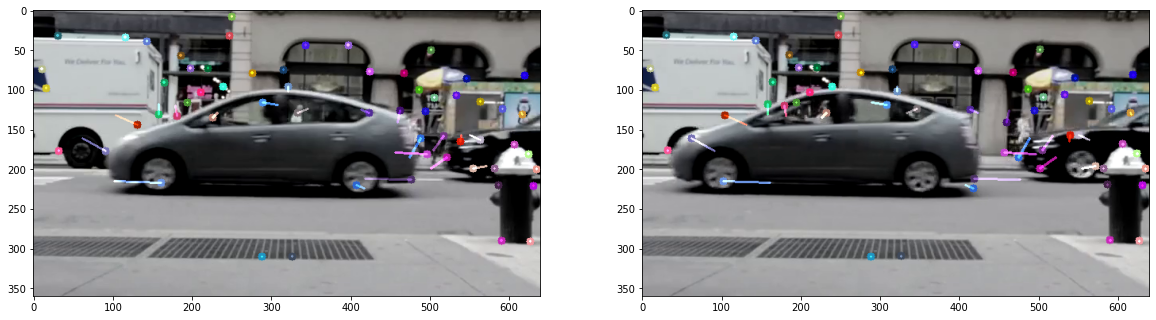

In [19]:
# Create some random colors
color = np.random.randint(0, 255, (100, 3))

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

# Draw the tracks
old_show, frame_show = old_frame.copy(), frame.copy()
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
    frame_show = cv2.circle(frame_show, (a, b), 5, color[i].tolist(), -1)
    old_show = cv2.circle(old_show, (c, d), 5, color[i].tolist(), -1)

frame_show = cv2.add(frame_show, mask)
old_show = cv2.add(old_show, mask)

# Show result
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(old_show, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(frame_show, cv2.COLOR_BGR2RGB))

### Run Optical Flow (Dense)

In [20]:
# Calculate Optical Flow
if ALGO_DENSE == 'lucaskanade_dense':
    flow = cv2.optflow.calcOpticalFlowSparseToDense(old_gray, frame_gray, None)
else:# rlof
    flow = cv2.optflow.calcOpticalFlowSparseToDense(old_frame, frame, None)

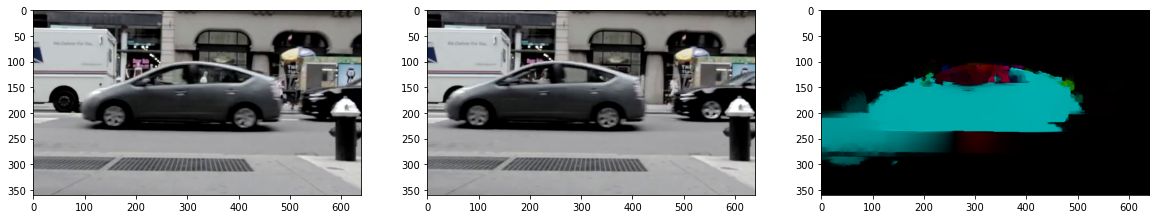

In [21]:
# crate HSV & make Value a constant
hsv = np.zeros_like(old_frame)
hsv[..., 1] = 255

# Encoding: convert the algorithm's output into Polar coordinates
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Use Hue and Saturation to encode the Optical Flow
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

# Convert HSV image into BGR for demo
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Show result
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(cv2.cvtColor(old_frame, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))